
# Chollet: Classifying Movie Reviews - IMDB Dataset

This is a colloquially accepted dataset with 46 different topics and at least 10 examples in each topic's training set. This data comes packaged as part of Keras. 


## Loading the IMDB Dataset

In [2]:

from keras.datasets import imdb


In [3]:

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)


In [4]:

#train_data[0]

len(train_data) == len(train_labels)


True

In [5]:

max([max(sequence) for sequence in train_data])


9999

In [6]:

# Define a dictionary which maps words to an integer index

word_index = imdb.get_word_index() 

# Invert the word_index mapping, so that the dictionary maps integers to respective words

reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

# Decode the review, which is stored as a sequence of integers. Start at 3 because the first elements are padding, start of sequence and unknown. 

decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])


In [7]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## Preparing the Data

In [8]:

import numpy as np

def vectorize_sequences(sequences, dimension=10000):

    # Initialize a zero matrix that can be used as a frame for our experiment. Has shape (len(sequences), dimension)
    
    results = np.zeros((len(sequences), dimension))

    # Set particular indices of results[i] to 1
    
    for i, sequence in enumerate(sequences):

        results[i, sequence] = 1

    return results

# Use this function to vectorize train and test data

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [9]:

x_train[0]


array([0., 1., 1., ..., 0., 0., 0.])

In [10]:

# Vectorize the labels (response), which is straightforward

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(train_labels).astype('float32')



## Building your Network

This is the easiest categorization setup you'll come across, which has labels as scalars (1s, 0s). A network which performs well on this kind of data is a stack of dense layers with ReLU activation functions.

```python
# Example instance of Dense layer with ReLU activation functions

model.add(layers.Dense(16, activation='relu', input_shape = (10000,)))

```

*Figure 1: An example of how you'll see the Dense layer added onto a network model*

The number 16 is how many hidden units are in this dense layer. *Hidden unit* is a dimension in the representation space of the layer. Recall that each Dense layer with a relu activation function uses the following chain of tensor operations: 

```python
# Chain of operations applied by each Dense layer in the network

output = relu(dot(W, input) + b)

```
The weight matrix $M$ will have shape of 

```python
(input_dimension, 16)
```
This dot product projects the input into a 16 dimensional representation space, then apply the other simpler transformations. Adding nodes to the hidden layers gives the model more dimensional freeedom. Too much freedom can lead to learning unwanted patterns and makes the network more computationally expensive. 

Some key decision points are: 

* How many layers to use
* How many hidden units in each layer

Until later, we'll use 16 nodes/units in each hidden layer and a third layer to output the scalar prediction regarding the sentiment of the current review. 


In [11]:

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))



### Activation Functions: 

Most commonly, you'll see *ReLU*, *sigmoid* and *tanh* (another sigmoid). These special functions introduce nonlinearities and without them the whole network would be equivalent to just one layer. Without nonlinearities, additional layers would preserve the hypothesis space which isn't useful. 

Some other activation functions are *prelu* and *elu*.



### Loss Function and Optimizer

The output of a binary classification is probability-valued so its best to use the *binary_crossentropy* loss. Another choice could be *mean_squared_error*  but *binary_crossentropy* is usually the best choice when working with probability-valued outputs. 

*Crossentropy* is a metric from Information Theory which measures the distance between probability distributions or, in this case, distance between the ground-truth distribution and the predicted values. 


In [12]:

# Compile the model using a specific loss function and optimizer algorithm

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])




### Configuring the Optimizer

RMSprop is being passed as a string which subjects the model to default arguments. When they need to be adjusted, use the following: 

```python
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
                   
```

### Custom Metrics

If other metrics need to be used, they are passed as functions to the 'metrics' kwarg in the compilation line. 

```python

from keras import optimizers
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=[metrics.binary_accuracy])

```



In [13]:

from keras import optimizers
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=[metrics.binary_accuracy])



## Validating Your Approach

Create a validation set by setting apart 10,000 samples from the original training data.



In [14]:

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [15]:

# Train the model for 20 epochs (iterations over all samples in x_train and y_train tensors) in mini-batches of 512 samples. Monitor loss and accuracy on the 10,000 samples
#    that you've set apart. Do this by passing the validation_data argument. 

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data = (x_val, y_val))




Epoch 1/20
30/30 [==============================] - 1s 31ms/step - loss: 0.5111 - acc: 0.7851 - val_loss: 0.3900 - val_acc: 0.8645
Epoch 2/20
30/30 [==============================] - 0s 7ms/step - loss: 0.3024 - acc: 0.9055 - val_loss: 0.3035 - val_acc: 0.8873
Epoch 3/20
30/30 [==============================] - 0s 6ms/step - loss: 0.2213 - acc: 0.9283 - val_loss: 0.2942 - val_acc: 0.8823
Epoch 4/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1734 - acc: 0.9443 - val_loss: 0.2985 - val_acc: 0.8791
Epoch 5/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1448 - acc: 0.9519 - val_loss: 0.2814 - val_acc: 0.8873
Epoch 6/20
30/30 [==============================] - 0s 5ms/step - loss: 0.1177 - acc: 0.9633 - val_loss: 0.2991 - val_acc: 0.8824
Epoch 7/20
30/30 [==============================] - 0s 6ms/step - loss: 0.0972 - acc: 0.9708 - val_loss: 0.3091 - val_acc: 0.8812
Epoch 8/20
30/30 [==============================] - 0s 6ms/step - loss: 0.0812 - acc: 0.9


## Plot the Training and Validation Loss

The call to model.fit returns a History object with a member called history. The member history contains all the data about what happened to the metrics and loss function during the model training. 

Next the data is plotted using MatPlotLib. 


In [16]:

# Load the history into memory: 

history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

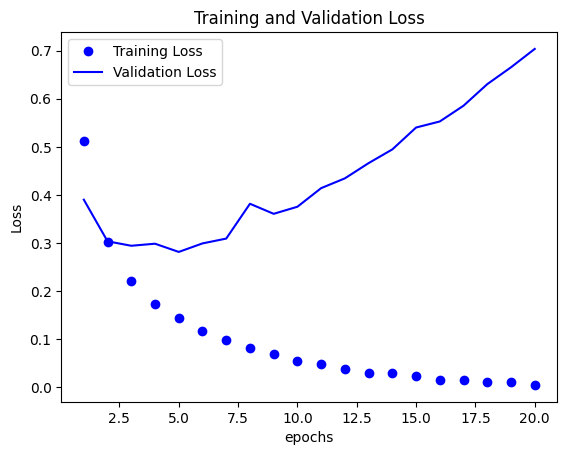

In [20]:

import matplotlib.pyplot as plt

plt.clf()

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']

epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


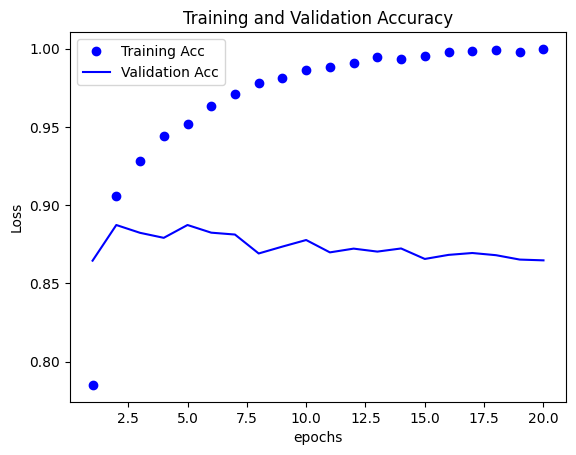

In [21]:

plt.clf() # Clear the figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training Acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



## Notes on Training and Validation Visualization

The training loss decreses with every epoch and the training accuracy increases with every epoch. Validation loss and accuracy reach a local maximum around the 4th epoch which is evidence of overfitting. The model has learned representations that are specific to the training data and do not generalize. 

We'll retrain a model from scratch and use four epochs, then evaluate the model on test data. 


In [46]:

model = models.Sequential()

model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(8, activation='tanh'))
model.add(layers.Dense(8, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=256)
results = model.evaluate(x_test, y_test)


Epoch 1/4
98/98 [==============================] - 0s 2ms/step - loss: 0.3767 - accuracy: 0.8540
Epoch 2/4
98/98 [==============================] - 0s 2ms/step - loss: 0.2112 - accuracy: 0.9240
Epoch 3/4
98/98 [==============================] - 0s 2ms/step - loss: 0.1672 - accuracy: 0.9420
Epoch 4/4
782/782 [==============================] - 0s 353us/step - loss: 1.8399 - accuracy: 0.5012


In [47]:
results

[1.8398704528808594, 0.5011600255966187]


## Use a Trained Network to Predict on New Data

Having trained the network, a practical setting will ask you to predict data. Use the *predict* method to generate the likelihood of reviews being positive. 


In [48]:

model.predict(x_test)


782/782 [==============================] - 0s 338us/step


array([[0.03101639],
       [0.99146354],
       [0.9462551 ],
       ...,
       [0.08422857],
       [0.0265405 ],
       [0.7679668 ]], dtype=float32)